#Taller Group by, count, value_counts

1. Cargar el CSV phone_data y convertir la columna date de string a tiempo

In [40]:
import pandas as pd
import dateutil
import matplotlib
 
data = pd.read_csv('phone_data.csv', index_col='index')
data
data['date'] = data['date'].apply(dateutil.parser.parse)
data

,date,duration,item,month,network,network_type
index,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,2015-03-13 06:58:00,34.429,data,2015-03,data,data


2. ¿Cuál fue el ítem (llamada/datos) de mayor duración? 

In [41]:
data['duration'].max()

10528.0

In [42]:
data[data['duration']==data['duration'].max()]

,date,duration,item,month,network,network_type
index,,,,,,
816,2015-04-03 12:29:00,10528.0,call,2015-03,landline,landline


<AxesSubplot:xlabel='index'>

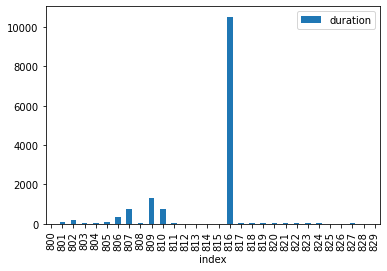

In [43]:
data.loc[800:,['duration']].plot(kind='bar')

*   ¿Cuál fue la llamada de mayor duración?

In [44]:
df = data[data['item']=='call']
df['duration'].max()
df[df['duration']==df['duration'].max()]
data[(data['duration']==data['duration'].max())&(data['item']=='call')]


,date,duration,item,month,network,network_type
index,,,,,,
816,2015-04-03 12:29:00,10528.0,call,2015-03,landline,landline


*   ¿Cuál fue el evento de datos de mayor duración?

In [83]:
df = data[data['item']=='data']
df['duration'].max()
df[df['duration']==df['duration'].max()]

#df.loc[0:827,['duration']].plot(kind='bar')
#data[(data['duration']==data['duration'].max())&(data['item']=='call')]

,date,duration,item,month,network,network_type
index,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
6,2014-10-16 06:58:00,34.429,data,2014-11,data,data
13,2014-10-17 06:58:00,34.429,data,2014-11,data,data
26,2014-10-18 06:58:00,34.429,data,2014-11,data,data
39,2014-10-19 06:58:00,34.429,data,2014-11,data,data
...,...,...,...,...,...,...
821,2015-09-03 06:58:00,34.429,data,2015-03,data,data
822,2015-10-03 06:58:00,34.429,data,2015-03,data,data
823,2015-11-03 06:58:00,34.429,data,2015-03,data,data


3. ¿Cuánto fue el total de segundos de todas las llamadas?

In [55]:
data['duration'][data['item'] == 'call'].sum()

92321.0



*   ¿Cuánto fue el total de segundos entre sms y eventos de datos?




In [60]:
data['duration'][(data['item'] == 'sms')|(data['item'] == 'data')].sum()

5456.35

4. ¿Cuantas entradas hay por cada uno de los meses

In [47]:
data['month']
data['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

*   ¿Cuantas entradas de datos hay por cada uno de las redes?



In [70]:
data['network'].value_counts()
data['network'][data['item']=='data'].value_counts()

data    150
Name: network, dtype: int64

*   ¿Cuantas entradas de llamada hay por cada una de las redes?


In [67]:
data['network'][data['item']=='call'].value_counts()

Three        128
Tesco         71
Vodafone      66
Meteor        54
landline      42
voicemail     27
Name: network, dtype: int64

5. Obtener la suma de la duración por mes

In [48]:
data['duration'].sum()
data.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

* Obtener el promedio de llamadas por cada una de las redes
* Obtener el promedio de eventos de datos por cada una de las redes


6. Obtener el número de entradas por mes

In [72]:
  data['date'].count()
  data.groupby('month').count()

830

In [71]:
data.groupby('month')['date'].count()
data['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

* Obtener el número de entradas tipo llamada por cada una de las redes
* Obtener el número de entradas tipo sms por cada una de las redes


7. Cuántos eventos de llamada, datos y sms hubo por mes

In [51]:
data.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

* Por cada uno de los meses, ¿cuántas veces se usaron cada una de las redes (para cualquier evento)?
* Por cada uno de los meses, ¿cuántas veces se usaron cada una de las redes discriminando el tipo de evento?
